1. Write a program to segment the boat and the people on it from the background. Follow the instruction below:
- Use 'boat.jpg' as input.
- Apply Otsu thresholding.
- Draw bounding box to identify the region where the boat and people are located.

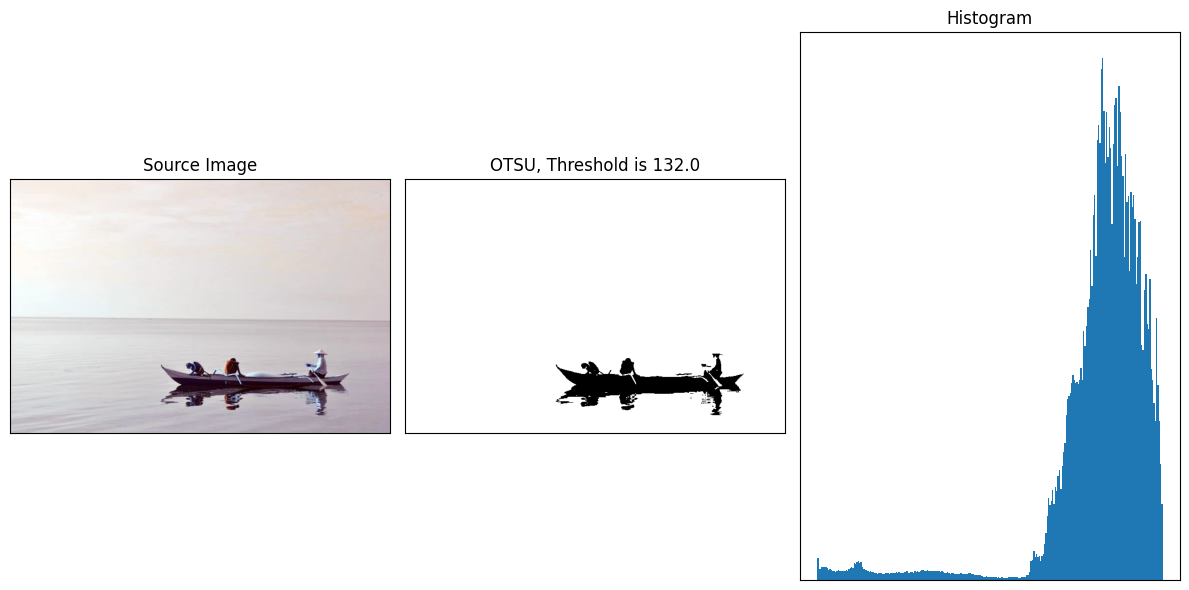

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("images/boat.jpg") 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(image, "gray")
plt.title("Source Image")
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.hist(image.ravel(), 256)
plt.title("Histogram")
plt.xticks([]), plt.yticks([])

ret1, th1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

plt.subplot(132)
plt.imshow(th1, "gray")
plt.title("OTSU, Threshold is " + str(ret1))
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


2. Write a program to visualize the effect of size of structuring element on the morphological transformation (e.g. erosion, dilation, opening, and closing).

- Load the 'leaf.jfif' and perform thresholding to segment the leaf from the background.
- Create a GUI containing trackbar to control the size of structuring element and display the resulting image on a window alongside the trackbar.


In [ ]:
import cv2
import numpy as np

def apply_morphological_operation(image, operation, size):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (size, size))
    if operation == 'erosion':
        return cv2.erode(image, kernel, iterations=1)
    elif operation == 'dilation':
        return cv2.dilate(image, kernel, iterations=1)
    elif operation == 'opening':
        return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    elif operation == 'closing':
        return cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    else:
        return image

def update_image(val):
    size = cv2.getTrackbarPos('Structuring Element Size', 'Morphological Transformations')
    operation = cv2.getTrackbarPos('Operation', 'Morphological Transformations')
    result_image = apply_morphological_operation(thresh_image.copy(), operations[operation], size)
    cv2.imshow('Morphological Transformations', result_image)

# Load the image
image = cv2.imread('images/leaf.jfif', cv2.IMREAD_GRAYSCALE)

# Perform thresholding to segment the leaf from the background
_, thresh_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Define available morphological operations
operations = {0: 'erosion', 1: 'dilation', 2: 'opening', 3: 'closing'}

# Create a GUI window with trackbars
cv2.namedWindow('Morphological Transformations')
cv2.createTrackbar('Structuring Element Size', 'Morphological Transformations', 1, 30, update_image)
cv2.createTrackbar('Operation', 'Morphological Transformations', 0, len(operations)-1, update_image)

# Initialize with default values
update_image(0)

# Wait until the user presses any key
cv2.waitKey(0)
cv2.destroyAllWindows()

3. Apply the steps shown in exercise 4 to segment the porcelain from these images: "porcelain1.jfif" - "porcelain5.jfif".

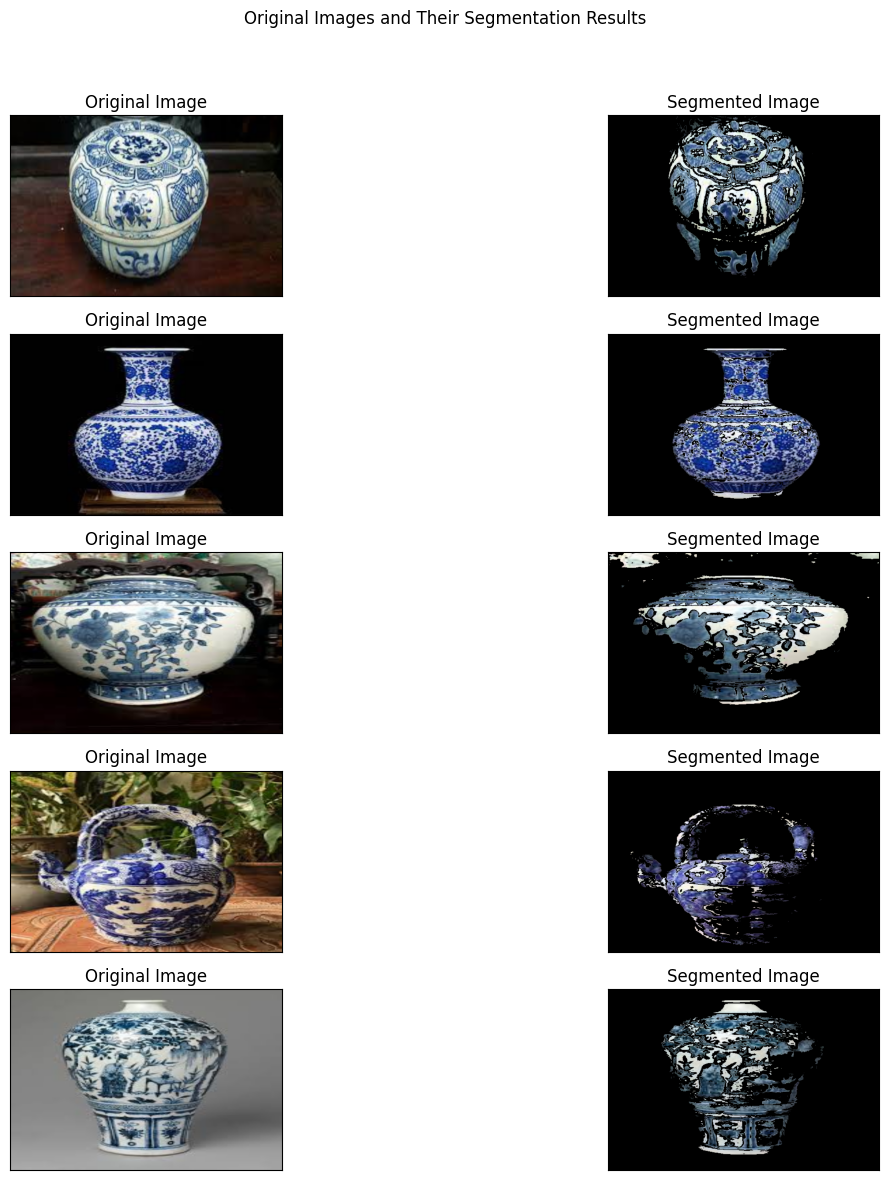

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def segment_and_show(image_path):
    # 读取图像
    image = cv2.imread(image_path)
    
    # 调整图像大小
    image = cv2.resize(image, (600, 400))
    
    # 将图像转换为HSV颜色空间
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # 设置瓷器的颜色范围（蓝色和白色示例）
    lower_blue = np.array([90, 50, 50])  # 蓝色的低阈值
    upper_blue = np.array([130, 255, 255])  # 蓝色的高阈值
    
    lower_white = np.array([0, 0, 200])  # 白色的低阈值
    upper_white = np.array([180, 30, 255])  # 白色的高阈值
    
    # 创建颜色掩码
    blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)
    white_mask = cv2.inRange(hsv, lower_white, upper_white)
    
    # 合并颜色掩码
    color_mask = cv2.bitwise_or(blue_mask, white_mask)
    
    # 对原始图像应用掩码
    segmented_image = cv2.bitwise_and(image, image, mask=color_mask)
    
    return image, segmented_image

# 读取五张图片并分割
image_paths = ["images/color_space/porcelain1.jfif",
               "images/color_space/porcelain2.jfif",
               "images/color_space/porcelain3.jfif",
               "images/color_space/porcelain4.jfif",
               "images/color_space/porcelain5.jfif"]

plt.figure(figsize=(15, 12))

for i, image_path in enumerate(image_paths):
    original, segmented = segment_and_show(image_path)
    
    plt.subplot(5, 2, i*2 + 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(5, 2, i*2 + 2)
    plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
    plt.title("Segmented Image")
    plt.xticks([]), plt.yticks([])

plt.suptitle("Original Images and Their Segmentation Results")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
